In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
paired_data = list(zip(datafiles[::2], datafiles[1::2]))

NameError: name 'datafiles' is not defined

In [6]:
sensor_data = {}
for before, post in paired_data:
    sensor = before.split('_')[0]
    df_b = pd.read_csv(data_folder/before, skiprows=3, names=['col','row', 'p0', 'p1', 'c', 't'], sep=" ")
    df_p = pd.read_csv(data_folder/post, skiprows=3, names=['col','row', 'p0', 'p1', 'c', 't'], sep=" ")
    sensor_data[sensor] = (df_b, df_p)


In [7]:
sensor_data.keys()

dict_keys(['S6', 'S8', 'S16', 'S17', 'S21', 'S22', 'S27', 'S29', 'S30'])

In [8]:
def make_params_plot(df, sensor, typ, destination, rang=None):
    fig,axes = plt.subplots(2,2, figsize=(8,8))
    fig.suptitle(sensor+ " " +typ, fontsize=16)
    ax = df['p1'].hist(ax=axes[0][0],bins=100)

    ax.set_title("p1 distribution all pixels bins=100")

    ax = df['p0'].hist(ax=axes[0][1],bins=100)

    ax.set_title("p0 distribution all pixels bins=100")

    ax = df['c'].hist(ax=axes[1][0],bins=100)

    ax.set_title("c distribution all pixels bins=100")

    rang = df['t'].min(), df['t'].max()
    ax = df['t'].hist(ax=axes[1][1],bins=100, range=rang)
    ax.set_title("t distribution all pixels bins=100")

    fig.tight_layout()
    fig.savefig(destination/"{}_{}_param_hist.png".format(sensor, typ.lower()))


In [9]:

from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture


def make_3_plot(data, sensor, typ,destination, rang=None, ga_kwrgs={}):
    dataclean = data['t'][~data['t'].isna()]
    X = dataclean.values.reshape(-1,1)
    if rang is None:
        rang = (X.min(), X.max())

    model = GaussianMixture(3, **ga_kwrgs).fit(X)
    x = np.linspace(rang[0], rang[1], 1000)
    logprob = model.score_samples(x.reshape(-1, 1))
    responsibilities = model.predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    
    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(131)
    ax.hist(X, 100, density=True, histtype='stepfilled', alpha=0.4, range=rang)
    ax.plot(x, pdf, '-k')
    ax.plot(x, pdf_individual, '--k')
    ax.text(0.04, 0.96, "Best-fit Mixture",
            ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    ax.set_title("{}_{} fit".format(sensor, typ.lower()))
    fig.savefig(destination/"{}_{}_fit.png".format(sensor, typ.lower()))
    return model


/home/mwm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

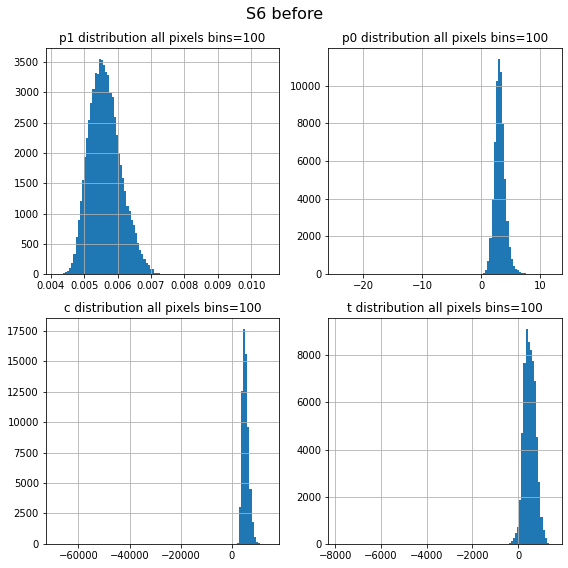

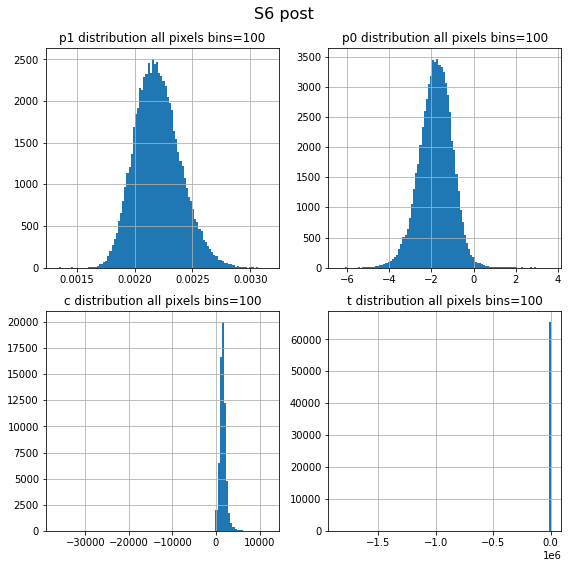

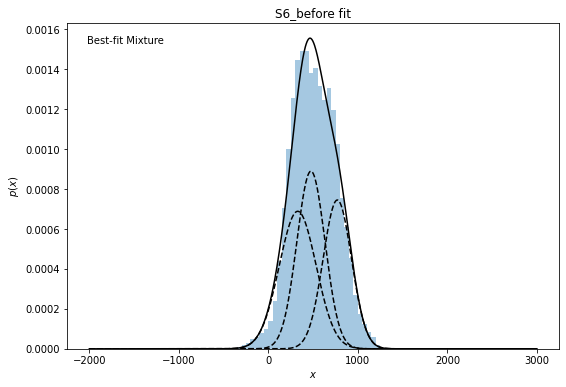

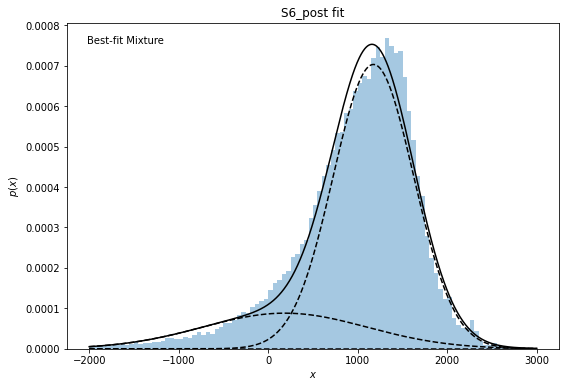

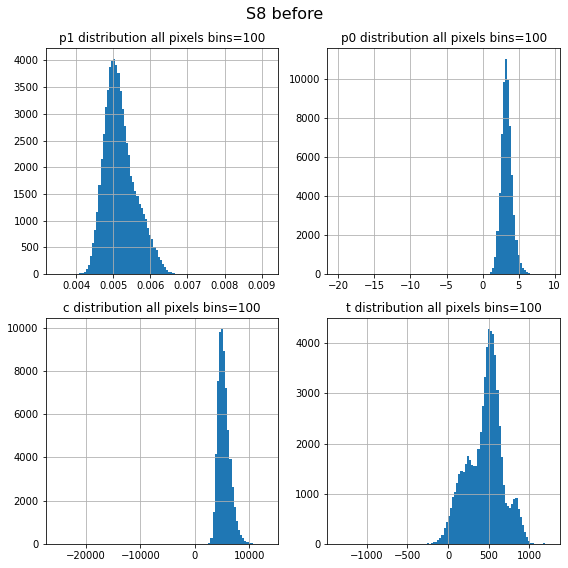

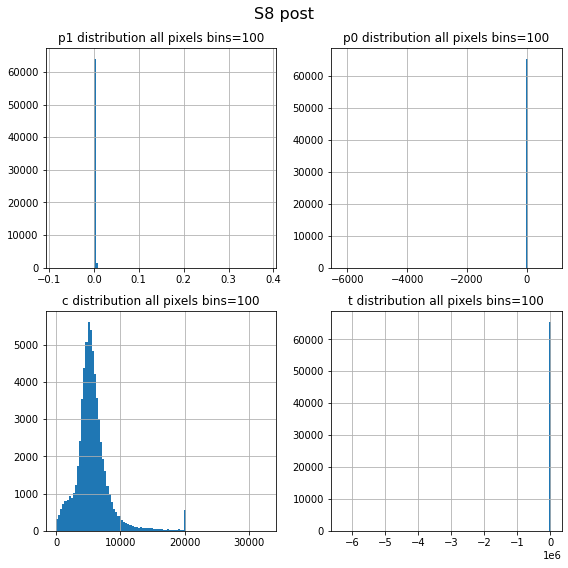

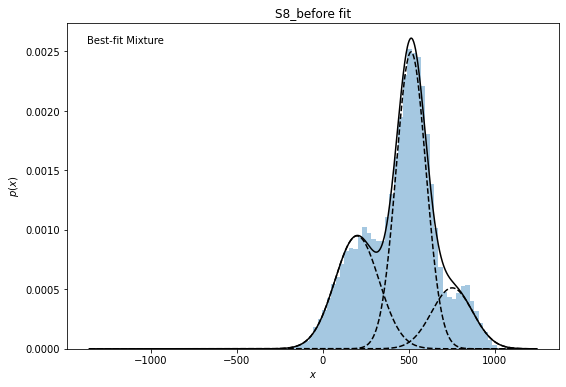

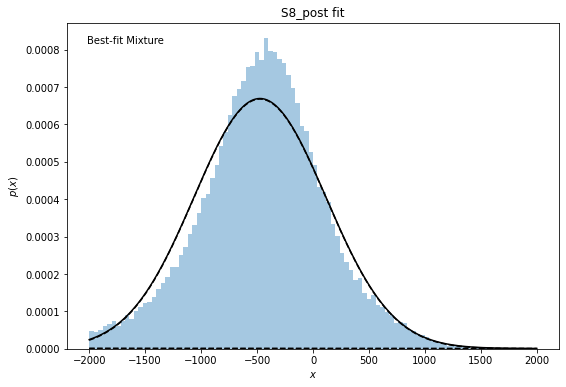

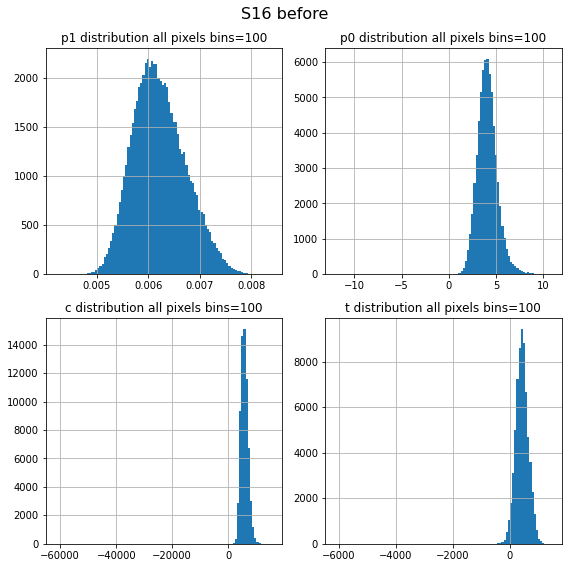

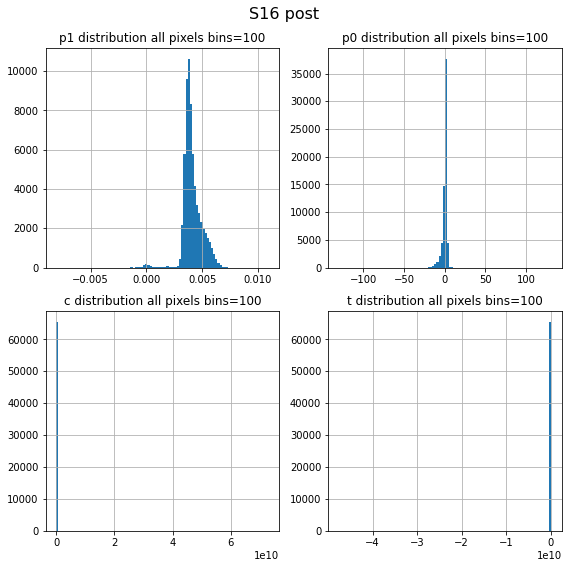

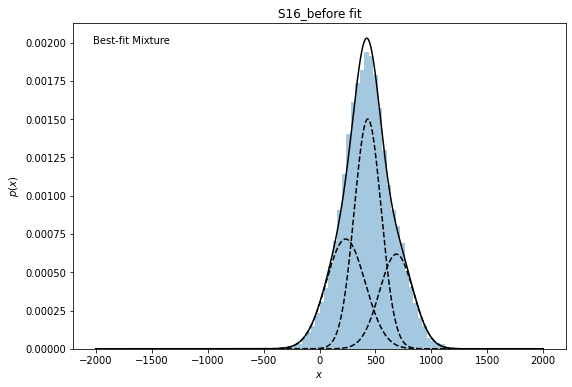

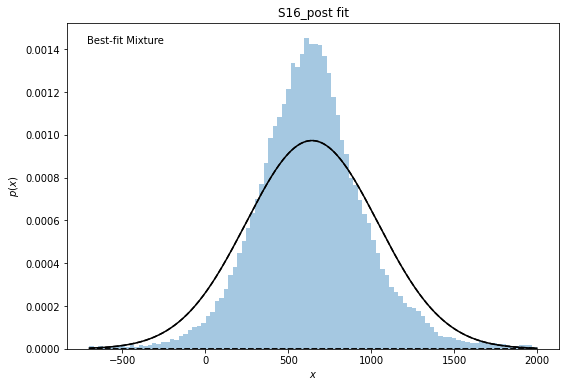

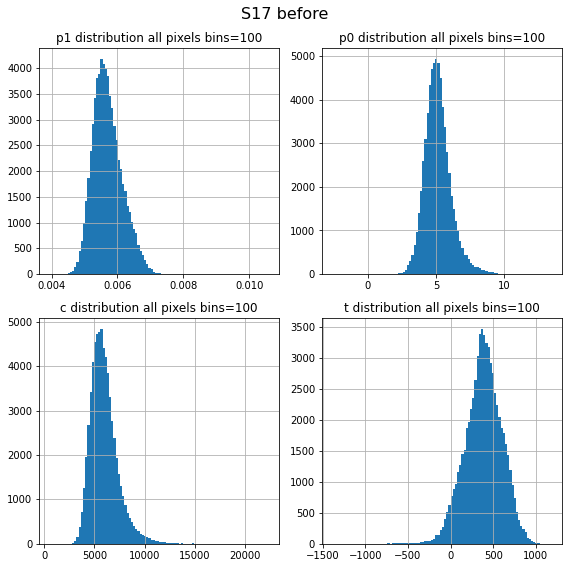

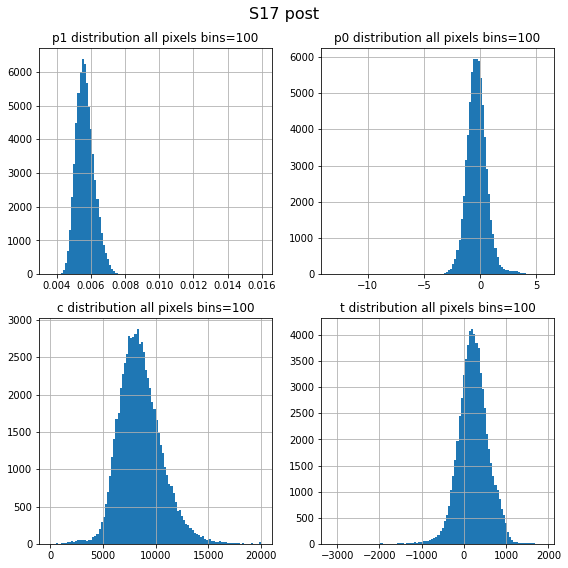

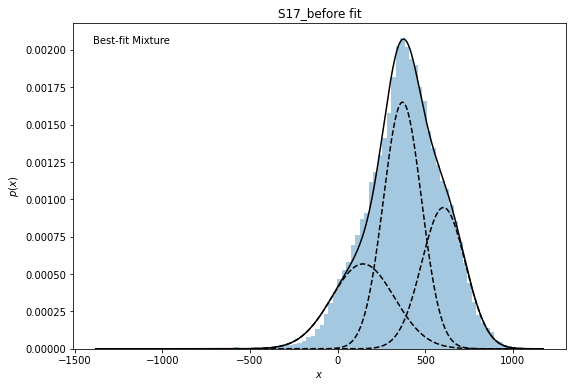

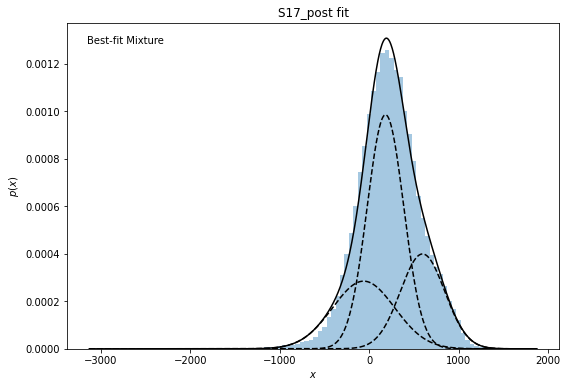

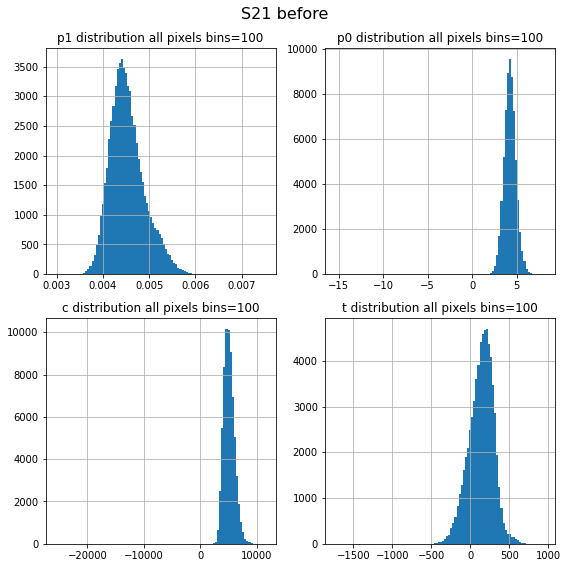

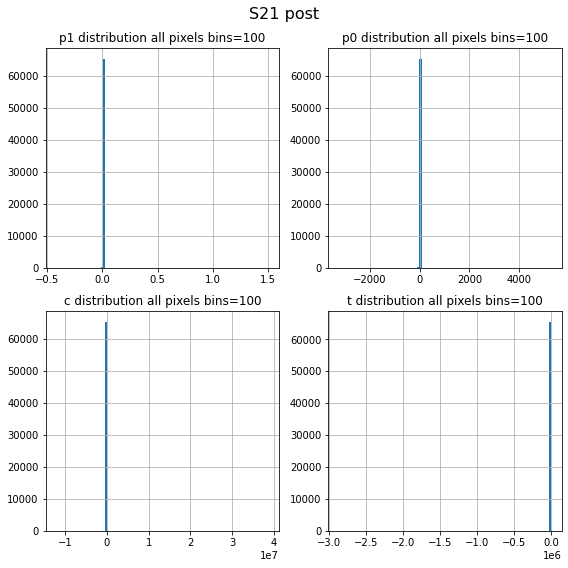

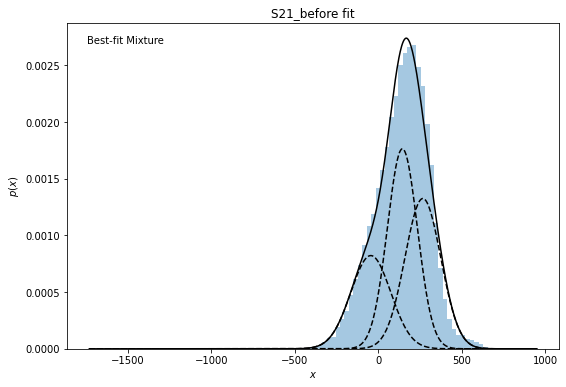

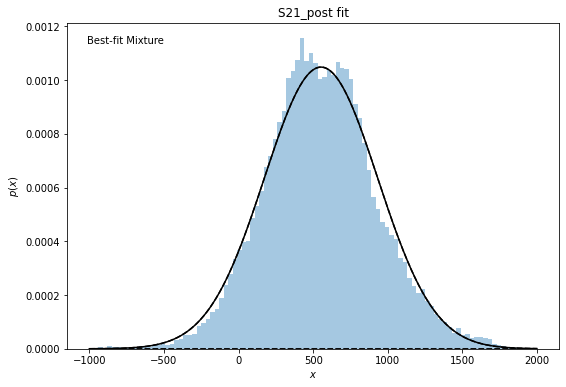

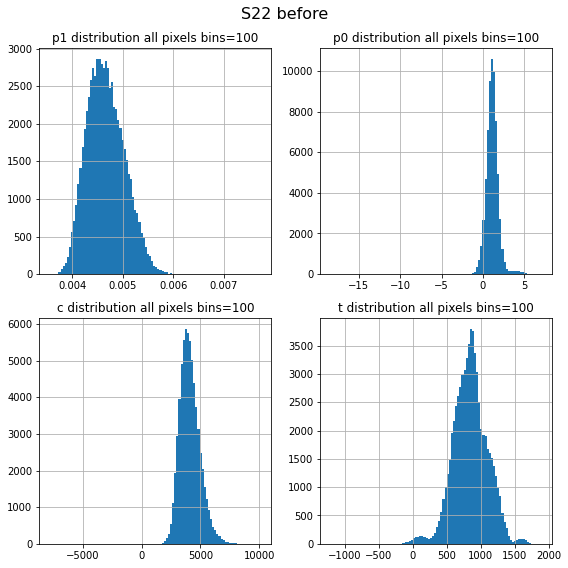

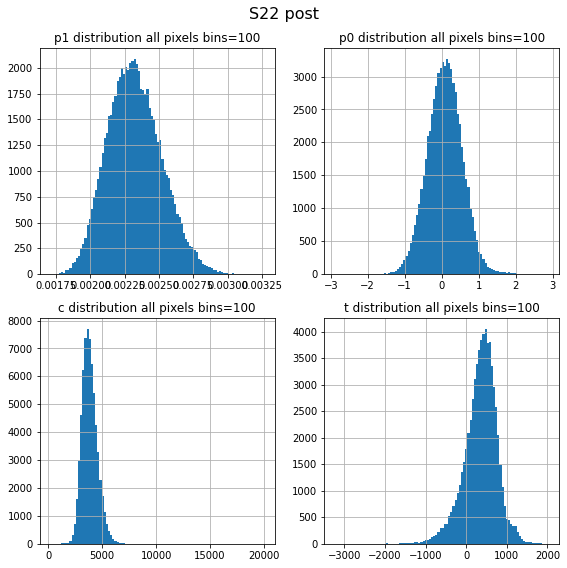

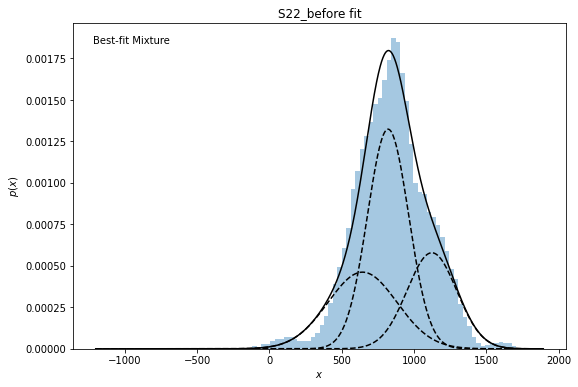

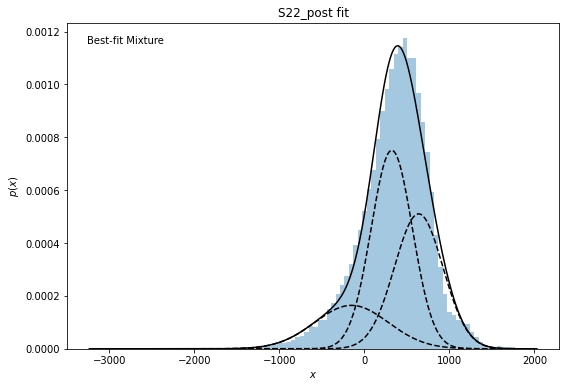

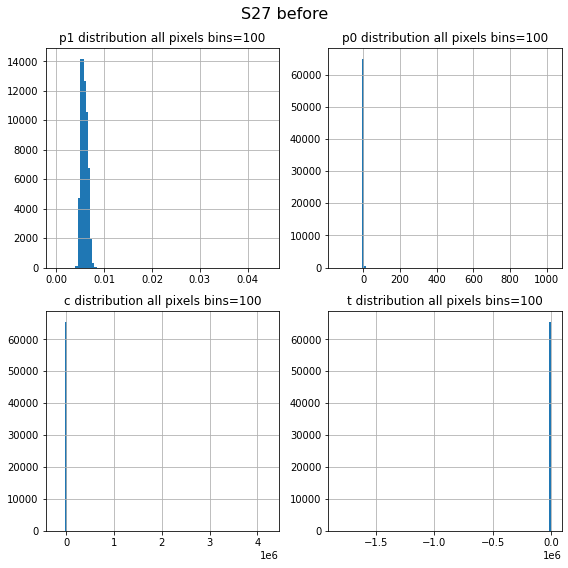

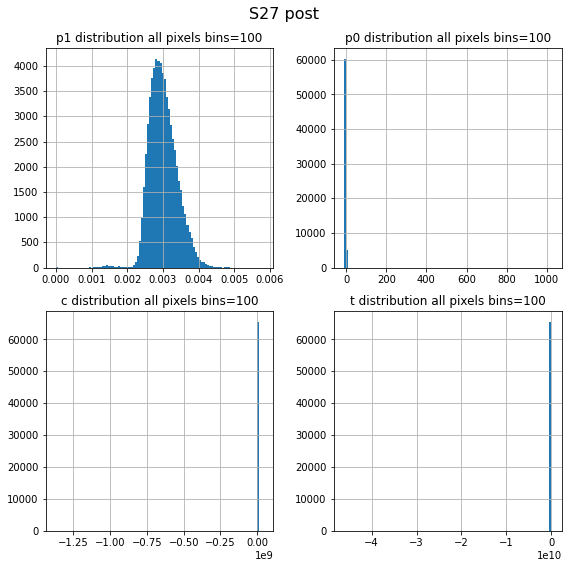

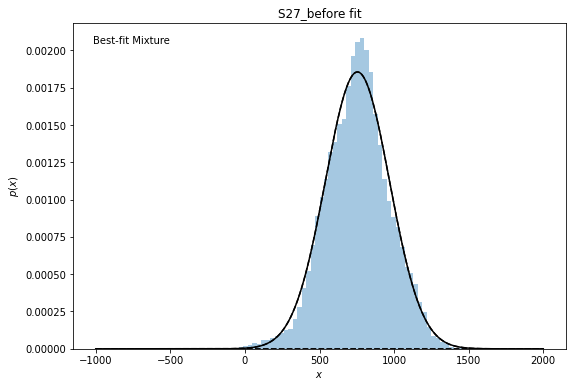

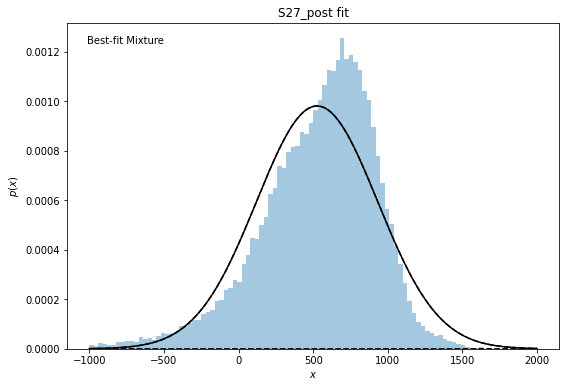

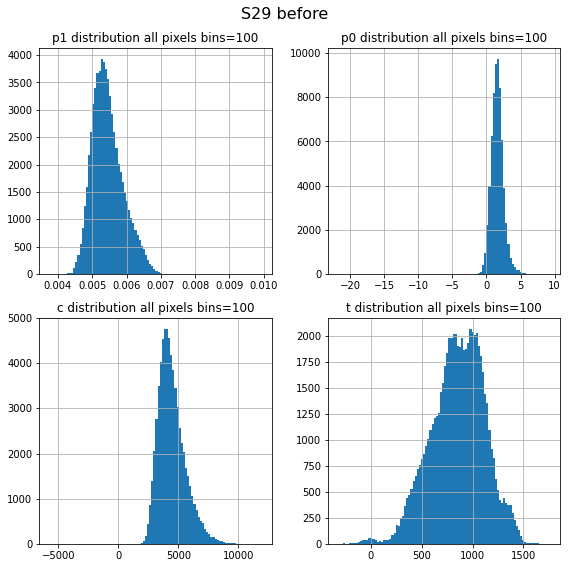

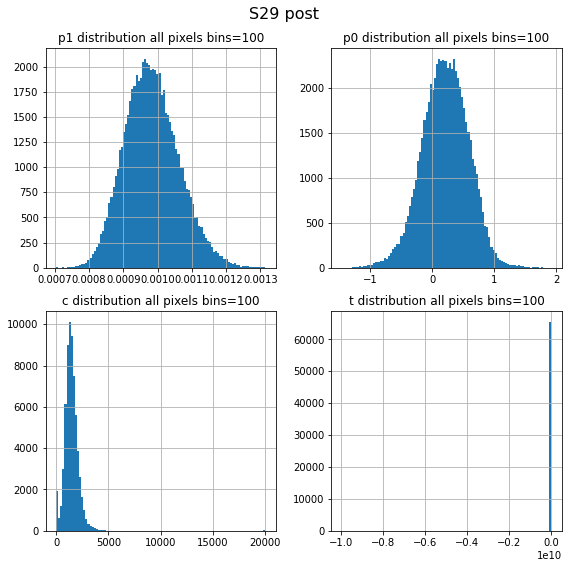

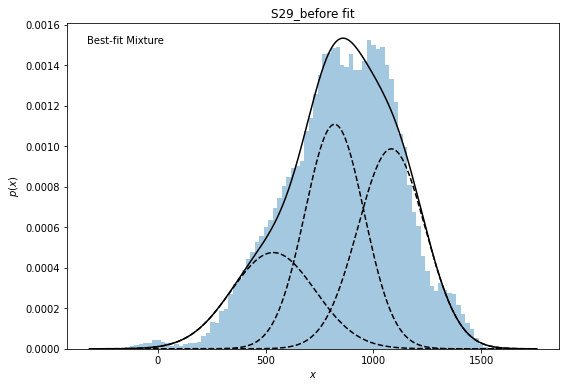

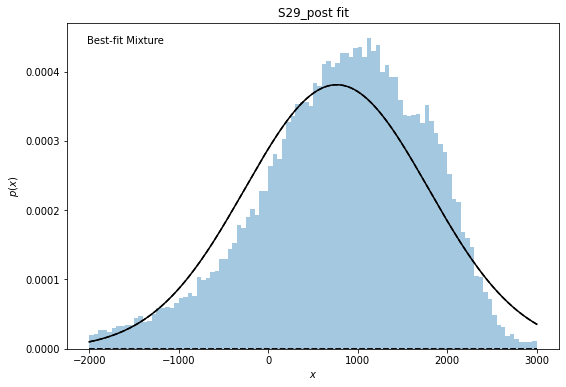

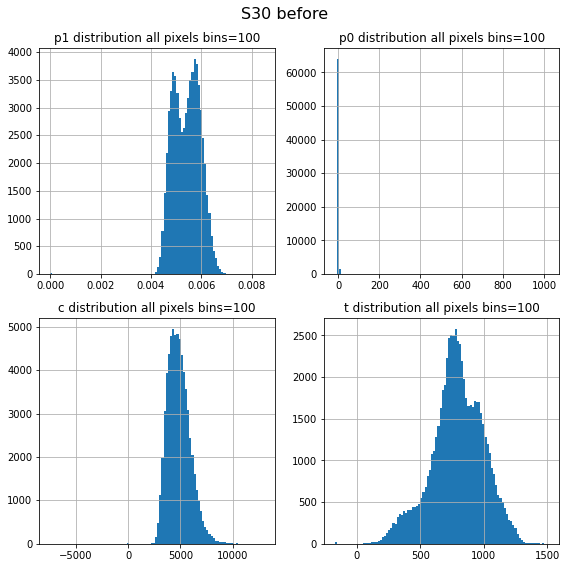

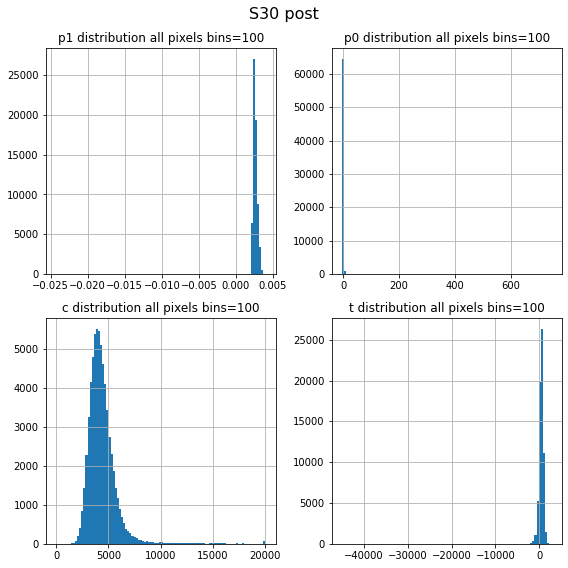

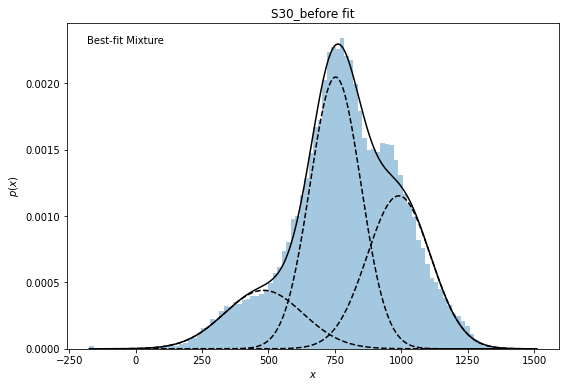

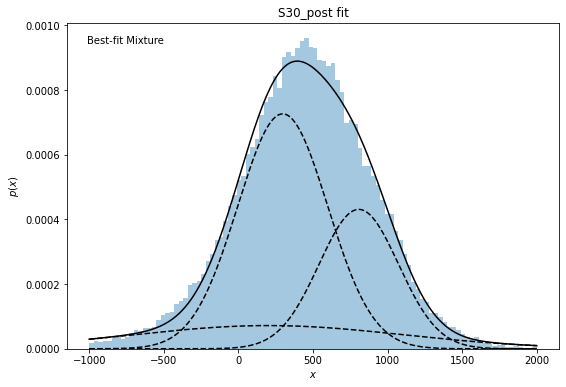

In [19]:
#['S6', 'S8', 'S16', 'S17', 'S21', 'S22', 'S27', 'S29', 'S30']

plotpath = Path('plots')


sensor = 'S6'
before, post = sensor_data[sensor]
rang = (-1000,2000)  
make_params_plot(before, sensor, 'before', plotpath, rang=rang)
rang = (-1000,2000)   
make_params_plot(post, sensor, 'post', plotpath, rang=rang)
rang = (-2000,3000)  
gm = make_3_plot(before, sensor, 'before', plotpath, rang=rang)
ga_kwrgs = dict(means_init=gm.means_, precisions_init=gm.precisions_, weights_init=gm.weights_)
make_3_plot(post, sensor, 'post', plotpath, rang=rang, ga_kwrgs=ga_kwrgs)
    
    
sensor = 'S8'
before, post = sensor_data[sensor]
make_params_plot(before, sensor, 'before', plotpath)
rang = (-2000,3000)       
make_params_plot(post, sensor, 'post', plotpath,rang=rang)
make_3_plot(before, sensor, 'before', plotpath)
rang = (-2000,2000)       
make_3_plot(post, sensor, 'post', plotpath,rang=rang)
    
    
sensor = 'S16'
before, post = sensor_data[sensor]
rang = (-1000,2000)
make_params_plot(before, sensor, 'before', plotpath, rang=rang)
make_params_plot(post, sensor, 'post', plotpath, rang=rang)
rang = (-2000,2000)
make_3_plot(before, sensor, 'before', plotpath, rang=rang)
rang = (-700,2000)
means = np.array([[560], [560], [560]])
weights = np.array([0.7, 0.2, 0.1])
gw = {"weights_init": weights, "means_init":means}
make_3_plot(post, sensor, 'post', plotpath, rang=rang, ga_kwrgs=gw)


sensor = 'S17'
before, post = sensor_data[sensor]
make_params_plot(before, sensor, 'before', plotpath)
make_params_plot(post, sensor, 'post', plotpath)
make_3_plot(before, sensor, 'before', plotpath)
make_3_plot(post, sensor, 'post', plotpath)
    
sensor = 'S21'
before, post = sensor_data[sensor]
make_params_plot(before, sensor, 'before', plotpath)
rang = (-1000,2000)
make_params_plot(post, sensor, 'post', plotpath, rang=rang)
make_3_plot(before, sensor, 'before', plotpath)
rang = (-1000,2000)
make_3_plot(post, sensor, 'post', plotpath, rang=rang)
    

sensor = 'S22'
before, post = sensor_data[sensor]
make_params_plot(before, sensor, 'before', plotpath)
make_params_plot(post, sensor, 'post', plotpath)
make_3_plot(before, sensor, 'before', plotpath)
make_3_plot(post, sensor, 'post', plotpath)
    
    
sensor = 'S27'
before, post = sensor_data[sensor]
rang = (-1000,2000)
make_params_plot(before, sensor, 'before', plotpath, rang=rang)
make_params_plot(post, sensor, 'post', plotpath, rang=rang)
rang = (-1000,2000)
make_3_plot(before, sensor, 'before', plotpath, rang=rang)
make_3_plot(post, sensor, 'post', plotpath, rang=rang)


sensor = 'S29'
before, post = sensor_data[sensor]
make_params_plot(before, sensor, 'before', plotpath)
rang = (-2000,3000)        
make_params_plot(post, sensor, 'post', plotpath, rang=rang)
make_3_plot(before, sensor, 'before', plotpath)
rang = (-2000,3000)        
make_3_plot(post, sensor, 'post', plotpath, rang=rang)


sensor = 'S30'
before, post = sensor_data[sensor]
make_params_plot(before, sensor, 'before', plotpath)
rang = (-1000,2000)
make_params_plot(post, sensor, 'post', plotpath, rang=rang)
make_3_plot(before, sensor, 'before', plotpath)
rang = (-1000,2000)
make_3_plot(post, sensor, 'post', plotpath, rang=rang)


In [18]:
weights.shape

(3, 1)

In [80]:
edges[:-1]

array([-1202.29  , -1171.3235, -1140.357 , -1109.3905, -1078.424 ,
       -1047.4575, -1016.491 ,  -985.5245,  -954.558 ,  -923.5915,
        -892.625 ,  -861.6585,  -830.692 ,  -799.7255,  -768.759 ,
        -737.7925,  -706.826 ,  -675.8595,  -644.893 ,  -613.9265,
        -582.96  ,  -551.9935,  -521.027 ,  -490.0605,  -459.094 ,
        -428.1275,  -397.161 ,  -366.1945,  -335.228 ,  -304.2615,
        -273.295 ,  -242.3285,  -211.362 ,  -180.3955,  -149.429 ,
        -118.4625,   -87.496 ,   -56.5295,   -25.563 ,     5.4035,
          36.37  ,    67.3365,    98.303 ,   129.2695,   160.236 ,
         191.2025,   222.169 ,   253.1355,   284.102 ,   315.0685,
         346.035 ,   377.0015,   407.968 ,   438.9345,   469.901 ,
         500.8675,   531.834 ,   562.8005,   593.767 ,   624.7335,
         655.7   ,   686.6665,   717.633 ,   748.5995,   779.566 ,
         810.5325,   841.499 ,   872.4655,   903.432 ,   934.3985,
         965.365 ,   996.3315,  1027.298 ,  1058.2645,  1089.2

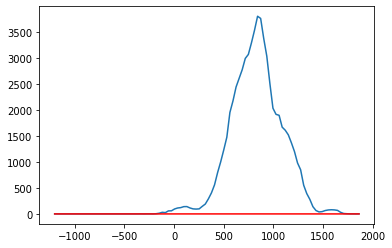

In [68]:
from scipy.optimize import curve_fit
from scipy.stats import crystalball
b, p = sensor_data['S22']


def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 4):
        beta = params[i]
        m = params[i+1]
        loc = params[i+2]
        scale = params[i+3]
        y += crystalball.pdf(x, beta, m, loc, scale)
    return y

popt, pcov = curve_fit(func, edges[:-1], vals, p0 = [1.5,2.1,600,40])
fit = func(edges[:-1], *popt)
plt.plot(edges[:-1],vals)
plt.plot(edges[:-1], fit , 'r-')
plt.show()

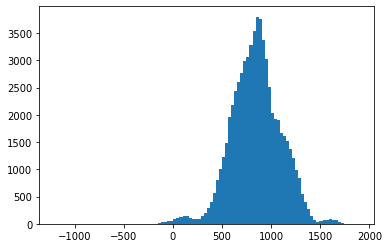

In [43]:
vals, edges, _ = plt.hist(b['t'], bins=100)

In [36]:
from scipy.stats import norm
a, b = 1., 2.
x = norm.rvs(a, b, size=1000, random_state=123)
loc1, scale1 = norm.fit(x)
loc1, scale1


(0.9208717278384163, 2.001575075032467)

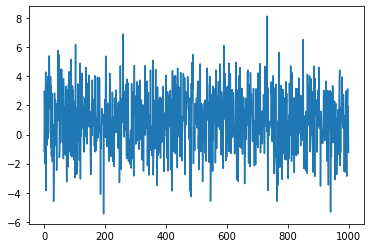

In [38]:
plt.plot(x)